In [1]:
import pandas as pd

In [2]:
churn_data = pd.read_csv("Churn_Modelling.csv")

#Data Preprocessing

In [3]:
#Displaying top 5 rows of the dataset.
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#check last 5 rows of dataset
churn_data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
#Finding the shape of the dataset
churn_data.shape

(10000, 14)

In [6]:
#Now let's just print the no of rows and columns 
print("Number of rows in the Churn dataset is: ",churn_data.shape[0])
print("Number of columns in the Churn datset is: ",churn_data.shape[1])


Number of rows in the Churn dataset is:  10000
Number of columns in the Churn datset is:  14


In [7]:
#information about the churn dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#checking the null values
churn_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#Overall Statistics of the dataset--for knowing categorical values use(include='all')
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
#dropping irrelevant features
churn_data.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
churn_data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True) #1----indicates row

In [12]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Data Visualization


In [13]:
#Relation with Numerical 

In [18]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt


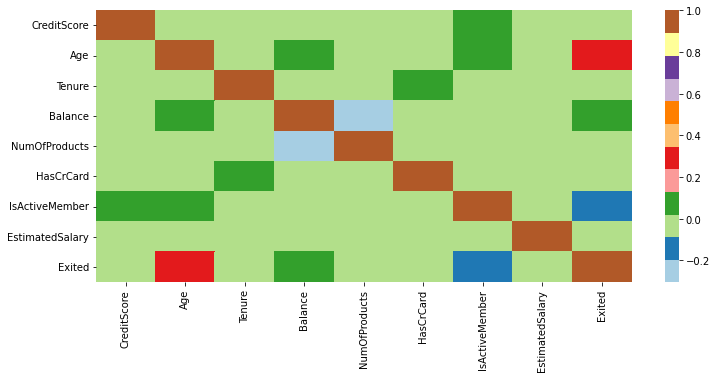

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap(churn_data.corr(),cmap="Paired")

####Univariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


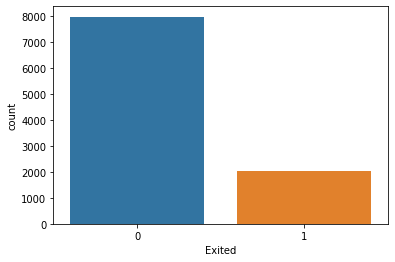

In [20]:
sns.countplot(churn_data['Exited'])

In [21]:
import matplotlib.pyplot as plt

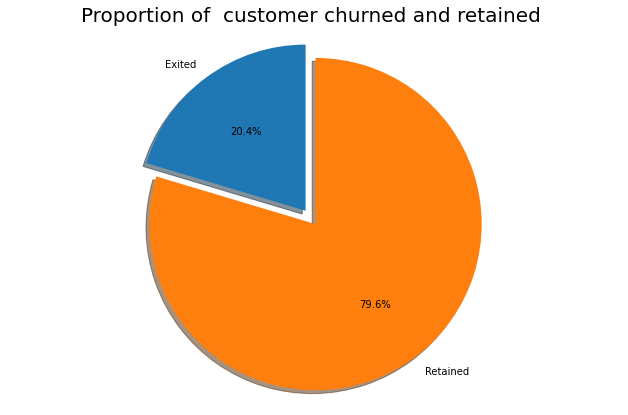

In [22]:
df=churn_data
labels='Exited','Retained'
sizes=[df.Exited[df['Exited']==1].count(),df.Exited[df['Exited']==0].count()]
explode=(0,0.1)
fig1,axi=plt.subplots(figsize=(11,7))
axi.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
axi.axis('equal')
plt.title("Proportion of  customer churned and retained ",size=20)
plt.show()

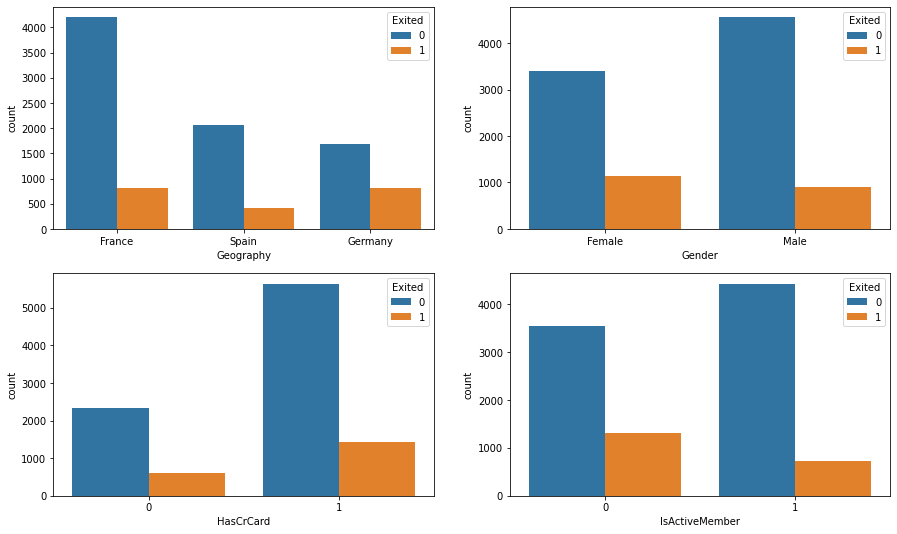

In [23]:
#Relation   With Categorical Variables

fig,axar=plt.subplots(2,2,figsize=(15,9))
sns.countplot(x='Geography',hue='Exited',data=df,ax=axar[0][0])
sns.countplot(x='Gender',hue='Exited',data=df,ax=axar[0][1])
sns.countplot(x='HasCrCard',hue='Exited',data=df,ax=axar[1][0])
sns.countplot(x='IsActiveMember',hue='Exited',data=df,ax=axar[1][1])

####Bivariate Data Analysis

In [24]:
#Bivariate Data Analysis

new_df1_target0=churn_data.loc[churn_data["Exited"]==0]
new_df1_target1=churn_data.loc[churn_data["Exited"]==1]


In [25]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

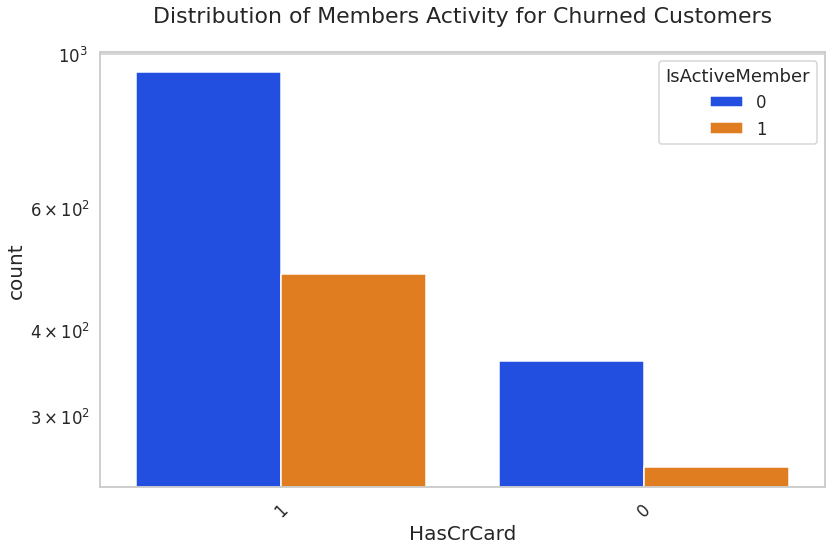

In [26]:
uniplot(new_df1_target1,col='HasCrCard',title='Distribution of Members Activity for Churned Customers',hue='IsActiveMember')

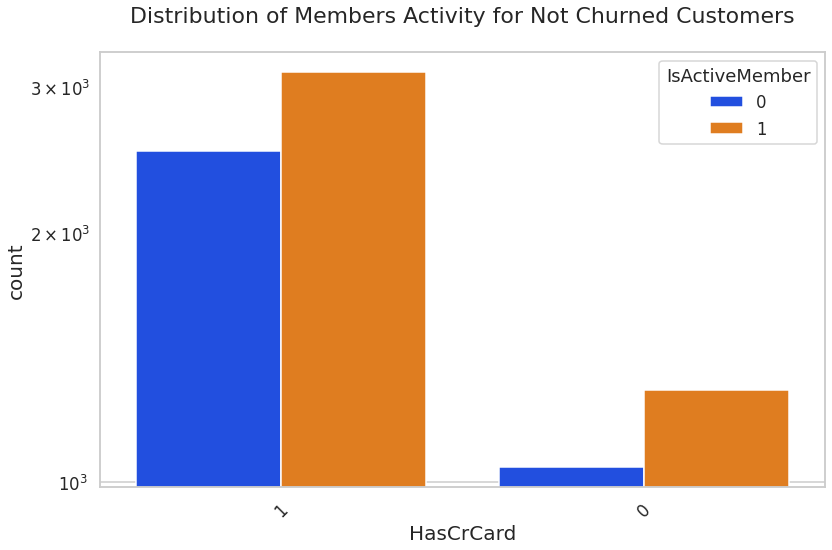

In [27]:
uniplot(new_df1_target0,col='HasCrCard',title='Distribution of Members Activity for Not Churned Customers',hue='IsActiveMember')

#Feature Engineering

In [28]:
#One Hot Encoding categorical data like geography and gender
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [29]:
churn_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [30]:
churn_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
churn_data=pd.get_dummies(churn_data)

In [32]:
churn_data


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [33]:
#we need to drop the first column in the datset to remove the issue of dummy variable trap
churn_data.drop(['Geography_France'],axis=1,inplace=True)

In [34]:
# Not Handing Imbalanced
#Let's count the values of the target variable i.e (exited)
churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [35]:
#splitting the dataset in to two parts
x=churn_data.drop('Exited',axis=1)
y=churn_data['Exited']

#Feature Scaling

In [36]:
#Handling imbalanced data with SMOTE
from imblearn.over_sampling import SMOTE

In [37]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [38]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [39]:
x_res.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Female  Gender_Male
350          39   0       109733.200000  2              0          0               123602.110000    1                  0                0              1              1
688          36   6       0.000000       1              0          0               41893.327428     0                  0                1              0              1
             29   1       0.000000       2              1          0               154695.570000    0                  0                0              1              1
                  9       144553.500000  2              1          0               143454.950000    1                  0                0              1              1
             32   2       207781.649252  1              1          0               133213.590932    0                  0                0              0             

In [40]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

In [42]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [43]:
sc=StandardScaler()

In [44]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# **Logistic Regression**


In [45]:

from sklearn.linear_model import LogisticRegression

In [46]:
lg=LogisticRegression()

In [47]:
lg.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred1=lg.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,y_pred1)

0.8119899560577527

In [51]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [52]:
precision_score(y_test,y_pred1)

0.8267123287671233

In [53]:
recall_score(y_test,y_pred1)

0.7772054088860271

In [54]:
f1_score(y_test,y_pred1)

0.8011948224361103

#Support Vector Classifier

In [55]:
from sklearn import svm

In [56]:
svm=svm.SVC()

In [57]:
svm.fit(x_train,y_train)

SVC()

In [58]:
y_pred2=svm.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred2)

0.8625235404896422

In [60]:
precision_score(y_test,y_pred2)

0.8795098706603132

In [61]:
recall_score(y_test,y_pred2)

0.8319381841596909

In [62]:
f1_score(y_test,y_pred2)

0.8550628722700199

#KNeighbours Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn=KNeighborsClassifier()

In [65]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
y_pred3=knn.predict(x_test)

In [67]:
accuracy_score(y_test,y_pred3)

0.835216572504708

In [68]:
precision_score(y_test,y_pred3)

0.8337662337662337

In [69]:
recall_score(y_test,y_pred3)

0.8267868641339343

In [70]:
f1_score(y_test,y_pred3)

0.8302618816682831

#Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dec=DecisionTreeClassifier()

In [73]:
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred4 = dec.predict(x_test)

In [75]:
accuracy_score(y_test,y_pred4)

0.8141870684243565

In [76]:
precision_score(y_test,y_pred4)

0.7931665649786455

In [77]:
recall_score(y_test,y_pred4)

0.8370895041854475

In [78]:
f1_score(y_test,y_pred4)

0.8145363408521303

#Random Forest Classifier

In [79]:
from  sklearn.ensemble import RandomForestClassifier

In [80]:
rfc=RandomForestClassifier()

In [81]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
y_pred5 = rfc.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred5)

0.8804143126177024

In [84]:
precision_score(y_test,y_pred5)

0.8825065274151436

In [85]:
recall_score(y_test,y_pred5)

0.8705730843528654

In [86]:
f1_score(y_test,y_pred5)

0.8764991896272285

#Gradient Boosting Classifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gbc=GradientBoostingClassifier()

In [89]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [90]:
y_pred6=gbc.predict(x_test)

In [91]:
accuracy_score(y_test,y_pred6)

0.8618957940991839

In [92]:
precision_score(y_test,y_pred6)

0.8778004073319755

In [93]:
recall_score(y_test,y_pred6)

0.8325820991629105

In [94]:
f1_score(y_test,y_pred6)

0.8545935228023793

#Final Model Preparation

In [95]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'Accuracy':[accuracy_score(y_test,y_pred1),
                                     accuracy_score(y_test,y_pred2),
                                     accuracy_score(y_test,y_pred3),
                                     accuracy_score(y_test,y_pred4),
                                     accuracy_score(y_test,y_pred5),
                                     accuracy_score(y_test,y_pred6)],
                         'Precision':[precision_score(y_test,y_pred1),
                                     precision_score(y_test,y_pred2),
                                     precision_score(y_test,y_pred3),
                                     precision_score(y_test,y_pred4),
                                     precision_score(y_test,y_pred5),
                                    precision_score(y_test,y_pred6)],
                           'recall':[recall_score(y_test,y_pred1),
                                     recall_score(y_test,y_pred2),
                                     recall_score(y_test,y_pred3),
                                    recall_score(y_test,y_pred4),
                                     recall_score(y_test,y_pred5),
                                    recall_score(y_test,y_pred6)],
                         'f1':[f1_score(y_test,y_pred1),
                                     f1_score(y_test,y_pred2),
                                     f1_score(y_test,y_pred3),
                                    f1_score(y_test,y_pred4),
                                     f1_score(y_test,y_pred5),
                                    f1_score(y_test,y_pred6)]
                         
                         })

In [96]:
final_data

,Models,Accuracy,Precision,recall,f1
0,LR,0.811990,0.826712,0.777205,0.801195
1,SVC,0.862524,0.879510,0.831938,0.855063
2,KNN,0.835217,0.833766,0.826787,0.830262
3,DT,0.814187,0.793167,0.837090,0.814536
4,RF,0.880414,0.882507,0.870573,0.876499
5,GBC,0.861896,0.877800,0.832582,0.854594


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


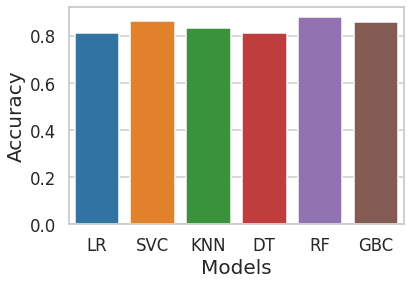

In [97]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


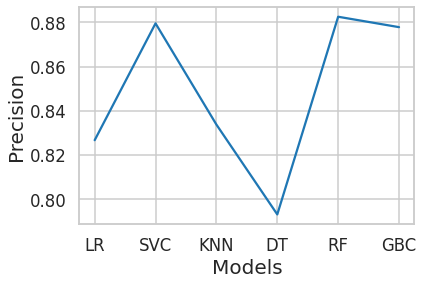

In [98]:
sns.lineplot(final_data['Models'],final_data['Precision'])

In [99]:
#save the model
x_res=sc.fit_transform(x_res)


In [100]:
rfc.fit(x_res,y_res)

RandomForestClassifier()

In [101]:
import joblib

In [102]:
joblib.dump(rfc,'bank_churn_predict_model')

['bank_churn_predict_model']

In [103]:
model=joblib.load('bank_churn_predict_model')

In [104]:
churn_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [105]:
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [106]:
model.predict([[619,43,2,90,2,1,1,101322,1,0,1,1]])

array([1])